<a href="https://colab.research.google.com/github/Nabin78/EV-population-data-WA-EDA/blob/main/EV_Population_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [29]:
df = pd.read_csv('/content/CleanEV.csv')
df.shape

(13533, 13)

In [30]:
df.head()

,vin,county,city,postal_code,model_year,make,model,electric_vehicle_type,electric_range,electric_utility,2020_census_tract,longitude,latitude
0,2T3YL4DV0E,King,Bellevue,98005,2014,TOYOTA,RAV4,BEV,103,"PUGET SOUND ENERGY INC, CITY OF TACOMA - (WA)",53033023604,-122.16210,47.64441
1,5YJ3E1EB6K,King,Bothell,98011,2019,TESLA,MODEL 3,BEV,220,"PUGET SOUND ENERGY INC, CITY OF TACOMA - (WA)",53033022102,-122.20563,47.76144
2,5UX43EU02S,Thurston,Olympia,98502,2025,BMW,X5,PHEV,40,PUGET SOUND ENERGY INC,53067011902,-122.92333,47.03779
3,JTMAB3FV5R,Thurston,Olympia,98513,2024,TOYOTA,RAV4 PRIME,PHEV,42,PUGET SOUND ENERGY INC,53067012332,-122.81754,46.98876
4,5YJYGDEE8M,Yakima,Selah,98942,2021,TESLA,MODEL Y,BEV,0,PACIFICORP,53077003200,-120.53145,46.65405


In [31]:
df.describe()

,postal_code,model_year,electric_range,2020_census_tract,longitude,latitude
count,13533.000000,13533.000000,13533.000000,1.353300e+04,13533.000000,13533.000000
mean,98217.243257,2021.067095,41.337471,5.302150e+10,-122.185862,47.398115
std,724.934858,3.359430,70.914983,7.153831e+08,0.976447,0.669600
min,60048.000000,2000.000000,0.000000,6.073007e+09,-124.385430,32.746640
25%,98039.000000,2019.000000,0.000000,5.303301e+10,-122.400920,47.411850
50%,98117.000000,2022.000000,17.000000,5.303302e+10,-122.302530,47.613340
75%,98333.000000,2024.000000,38.000000,5.303303e+10,-122.180500,47.700440
max,99403.000000,2025.000000,337.000000,5.307794e+10,-87.953430,48.999760


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13533 entries, 0 to 13532
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vin                    13533 non-null  object 
 1   county                 13533 non-null  object 
 2   city                   13533 non-null  object 
 3   postal_code            13533 non-null  int64  
 4   model_year             13533 non-null  int64  
 5   make                   13533 non-null  object 
 6   model                  13533 non-null  object 
 7   electric_vehicle_type  13533 non-null  object 
 8   electric_range         13533 non-null  int64  
 9   electric_utility       13533 non-null  object 
 10  2020_census_tract      13533 non-null  int64  
 11  longitude              13533 non-null  float64
 12  latitude               13533 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.3+ MB


In [33]:
df.isnull().sum()

,0
vin,0
county,0
city,0
postal_code,0
model_year,0
make,0
model,0
electric_vehicle_type,0
electric_range,0
electric_utility,0


In [35]:
df.shape

(13533, 13)

In [41]:
# Check unique values in categorical columns
categorical_cols = ['county', 'city', 'make', 'model', 'electric_vehicle_type', 'electric_utility']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].nunique()}")


Unique values in county: 40

Unique values in city: 282

Unique values in make: 46

Unique values in model: 170

Unique values in electric_vehicle_type: 2

Unique values in electric_utility: 58


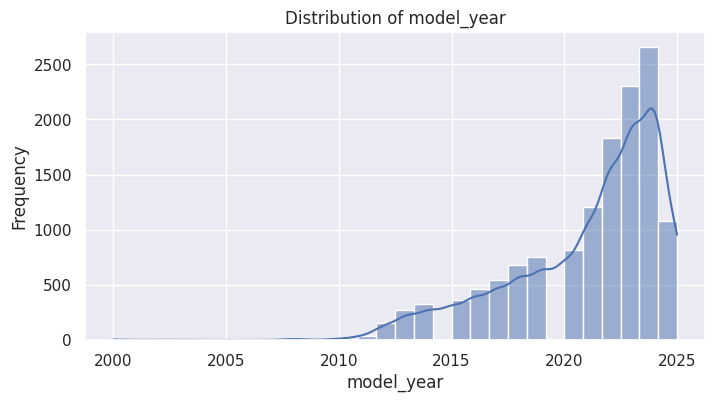

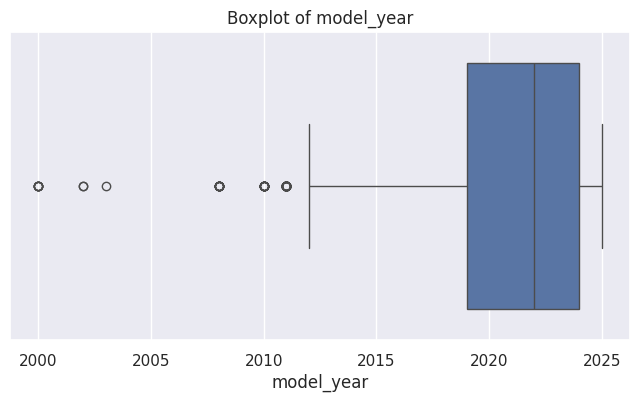


Summary Statistics for model_year:
count    13533.000000
mean      2021.067095
std          3.359430
min       2000.000000
25%       2019.000000
50%       2022.000000
75%       2024.000000
max       2025.000000
Name: model_year, dtype: float64


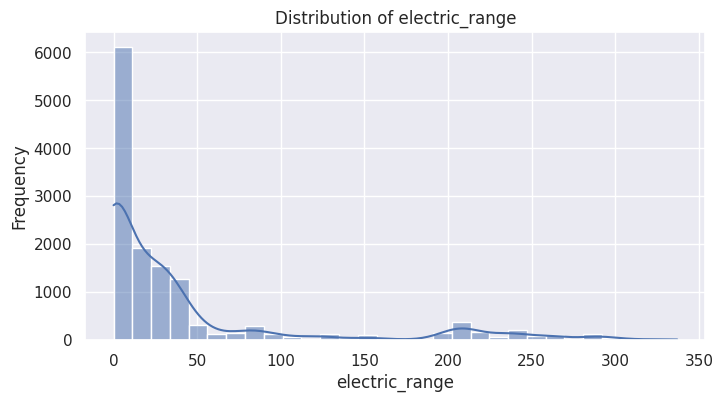

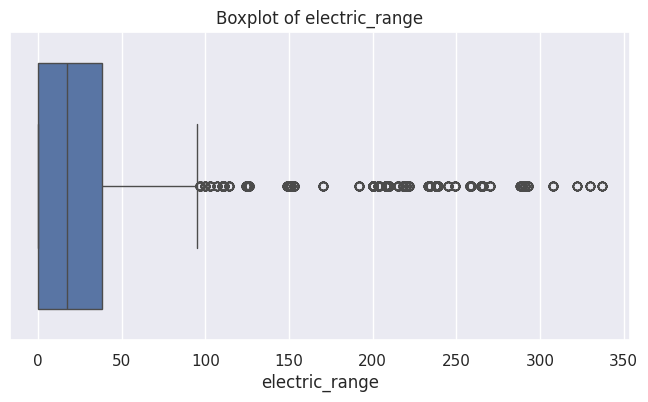


Summary Statistics for electric_range:
count    13533.000000
mean        41.337471
std         70.914983
min          0.000000
25%          0.000000
50%         17.000000
75%         38.000000
max        337.000000
Name: electric_range, dtype: float64


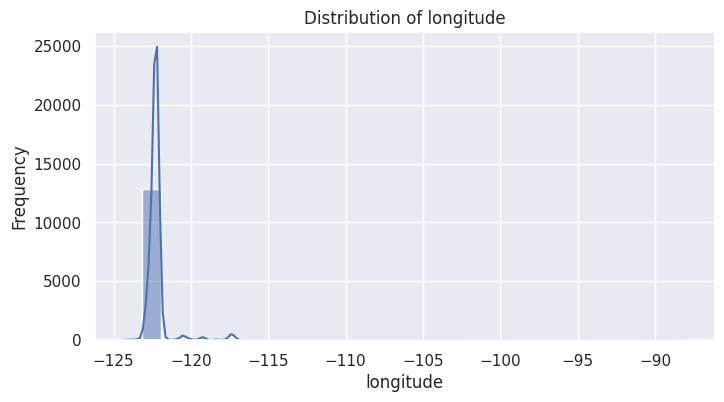

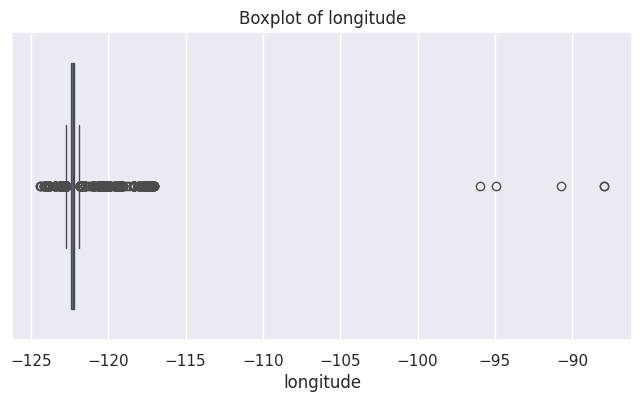


Summary Statistics for longitude:
count    13533.000000
mean      -122.185862
std          0.976447
min       -124.385430
25%       -122.400920
50%       -122.302530
75%       -122.180500
max        -87.953430
Name: longitude, dtype: float64


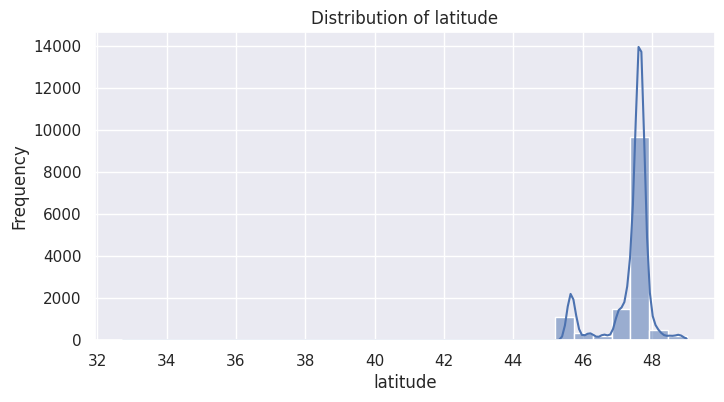

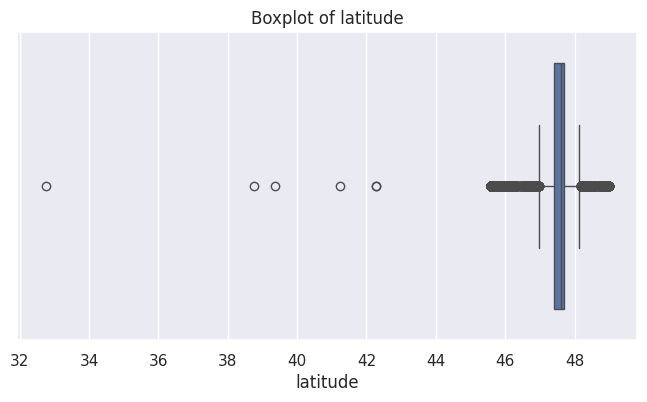


Summary Statistics for latitude:
count    13533.000000
mean        47.398115
std          0.669600
min         32.746640
25%         47.411850
50%         47.613340
75%         47.700440
max         48.999760
Name: latitude, dtype: float64


In [39]:
# Distribution of numerical variables
numerical_cols = ['model_year', 'electric_range', 'longitude', 'latitude']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Summary statistics
    print(f"\nSummary Statistics for {col}:")
    print(df[col].describe())

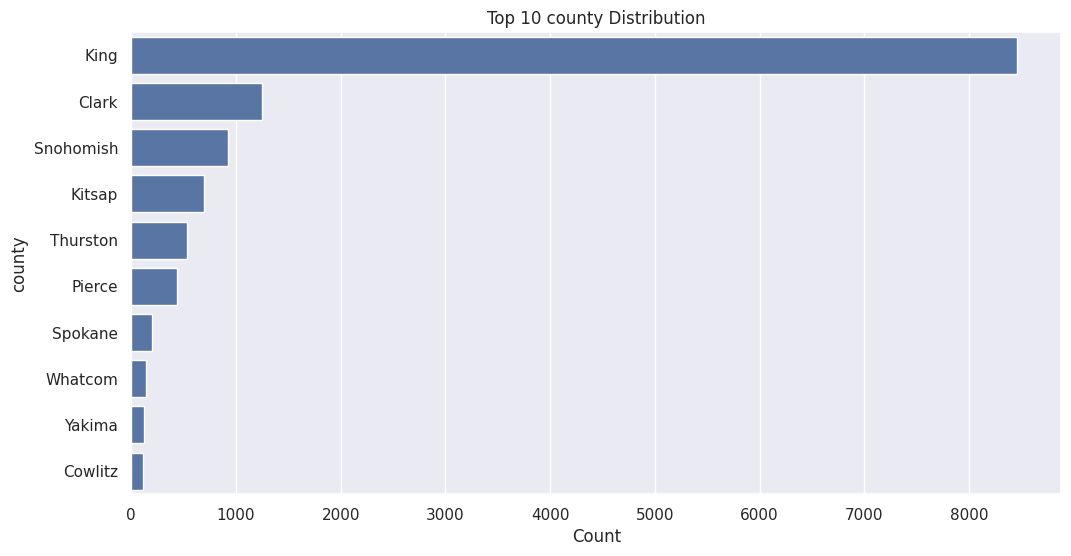


Value Counts for county:
county
King         8457
Clark        1248
Snohomish     924
Kitsap        692
Thurston      530
Pierce        438
Spokane       195
Whatcom       137
Yakima        119
Cowlitz       111
Name: count, dtype: int64


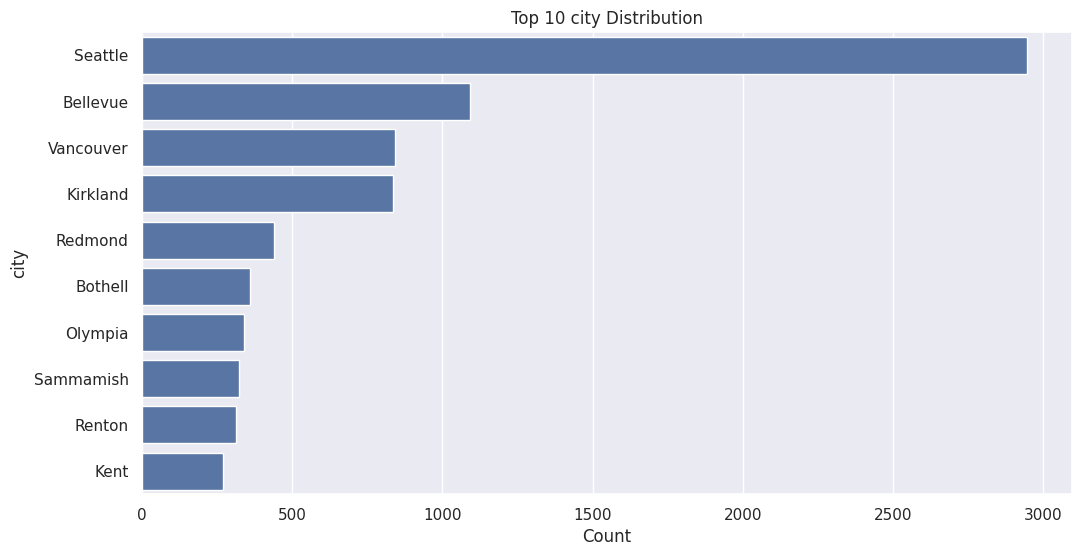


Value Counts for city:
city
Seattle      2947
Bellevue     1093
Vancouver     844
Kirkland      835
Redmond       439
Bothell       359
Olympia       340
Sammamish     325
Renton        314
Kent          272
Name: count, dtype: int64


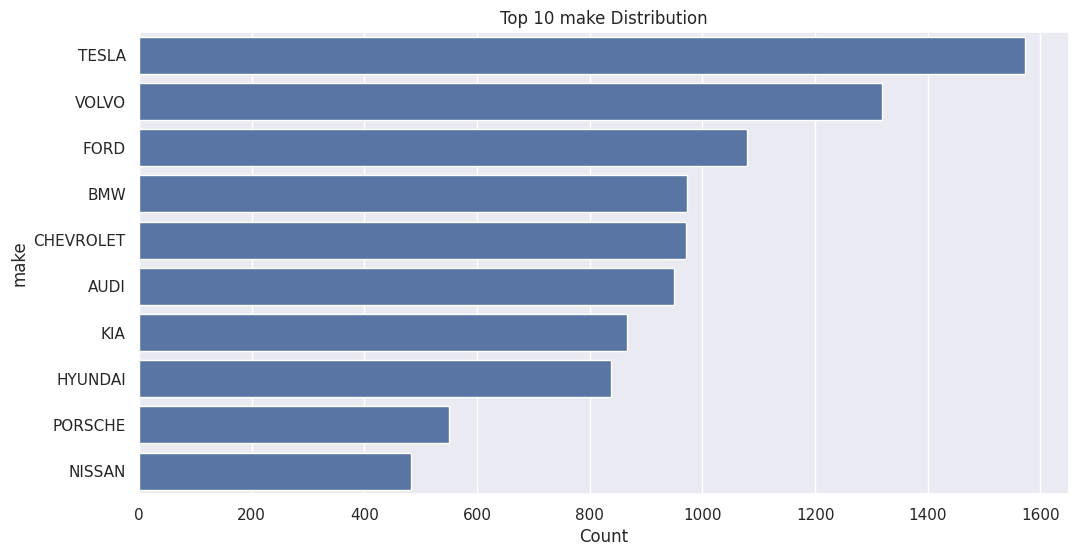


Value Counts for make:
make
TESLA        1572
VOLVO        1318
FORD         1079
BMW           973
CHEVROLET     970
AUDI          950
KIA           867
HYUNDAI       837
PORSCHE       551
NISSAN        482
Name: count, dtype: int64


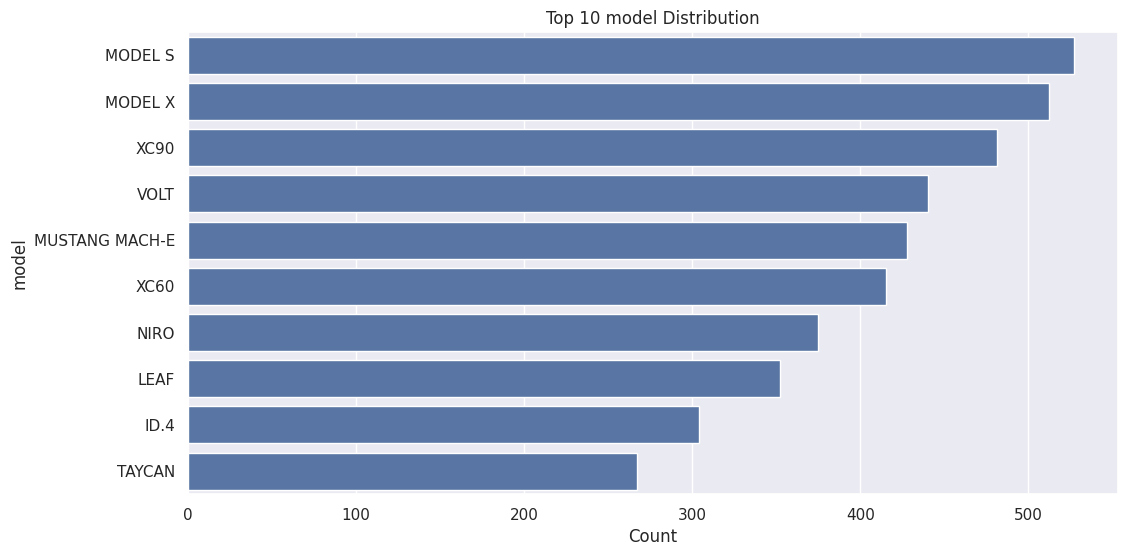


Value Counts for model:
model
MODEL S           527
MODEL X           512
XC90              481
VOLT              440
MUSTANG MACH-E    428
XC60              415
NIRO              375
LEAF              352
ID.4              304
TAYCAN            267
Name: count, dtype: int64


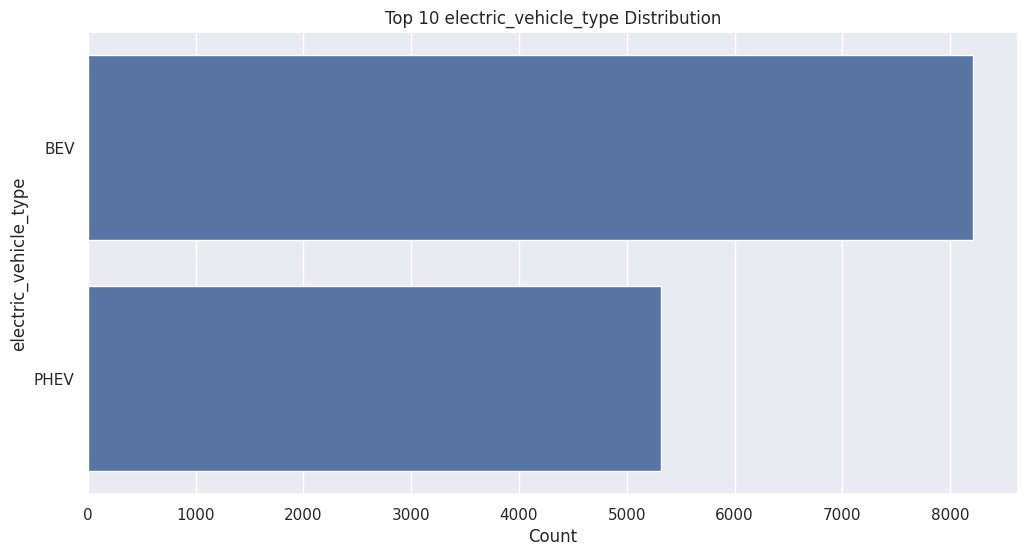


Value Counts for electric_vehicle_type:
electric_vehicle_type
BEV     8217
PHEV    5316
Name: count, dtype: int64


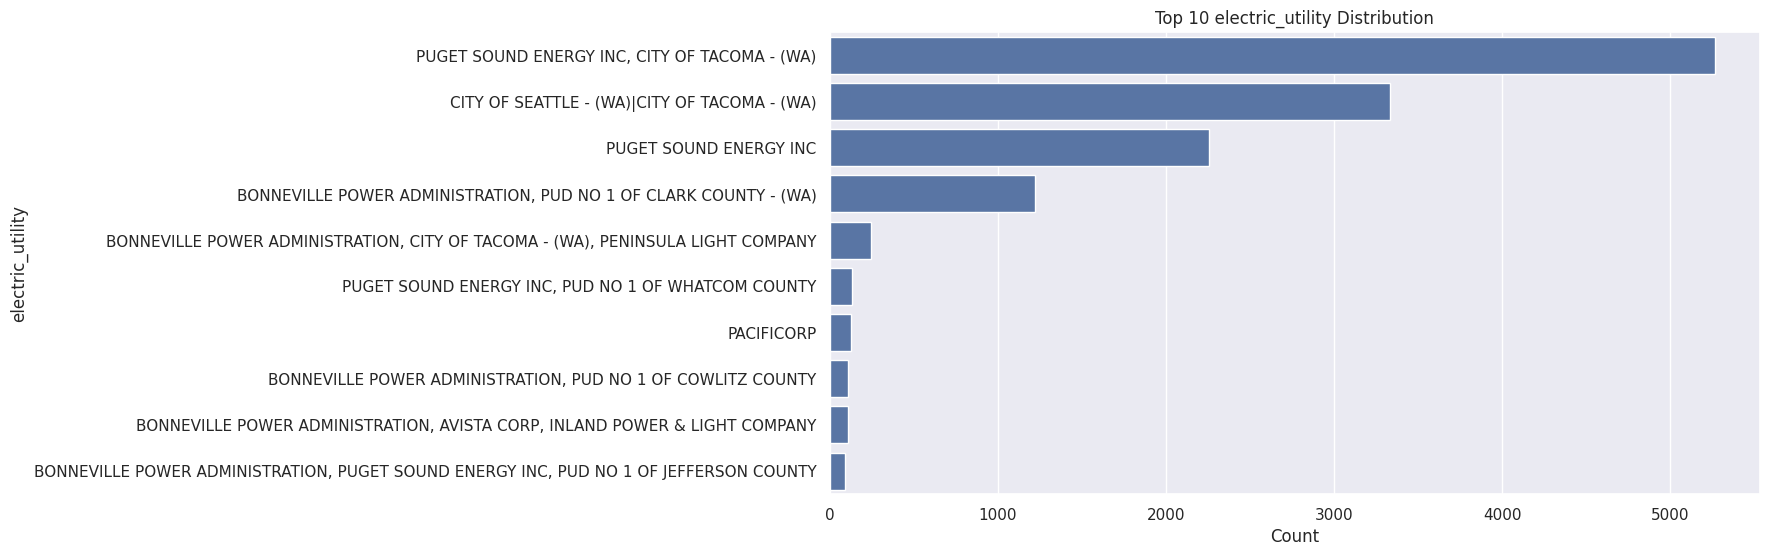


Value Counts for electric_utility:
electric_utility
PUGET SOUND ENERGY INC, CITY OF TACOMA - (WA)                                            5270
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                             3333
PUGET SOUND ENERGY INC                                                                   2259
BONNEVILLE POWER ADMINISTRATION, PUD NO 1 OF CLARK COUNTY - (WA)                         1222
BONNEVILLE POWER ADMINISTRATION, CITY OF TACOMA - (WA), PENINSULA LIGHT COMPANY           248
PUGET SOUND ENERGY INC, PUD NO 1 OF WHATCOM COUNTY                                        131
PACIFICORP                                                                                126
BONNEVILLE POWER ADMINISTRATION, PUD NO 1 OF COWLITZ COUNTY                               111
BONNEVILLE POWER ADMINISTRATION, AVISTA CORP, INLAND POWER & LIGHT COMPANY                108
BONNEVILLE POWER ADMINISTRATION, PUGET SOUND ENERGY INC, PUD NO 1 OF JEFFERSON COUNTY      88
Name: c

In [42]:
# Bar plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 for readability
    plt.title(f'Top 10 {col} Distribution')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

    # Value counts
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts().head(10))

In [44]:
df['vehicle_age'] = 2025 - df['model_year']

In [45]:
df['vehicle_age']

,vehicle_age
0,11
1,6
2,0
3,1
4,4
...,...
13528,3
13529,5
13530,3
13531,7


In [46]:
#Electic Range Category
bins = [0, 50, 100, 200, 300, np.inf]
labels = ['0-50', '51-100', '101-200', '201-300', '300+']
df['range_category'] = pd.cut(df['electric_range'], bins=bins, labels=labels, right=False)

In [48]:
df['region'] = pd.qcut(df['longitude'], q=4, labels=['West', 'Mid-West', 'Mid-East', 'East'])

In [50]:
df[['vehicle_age', 'range_category', 'region']]

,vehicle_age,range_category,region
0,11,101-200,East
1,6,201-300,Mid-East
2,0,0-50,West
3,1,0-50,West
4,4,0-50,East
...,...,...,...
13528,3,0-50,Mid-West
13529,5,201-300,Mid-West
13530,3,0-50,West
13531,7,51-100,East


In [51]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nOutliers in {column}: {len(outliers)}")
    return outliers

# Check outliers for numerical columns
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    if len(outliers) > 0:
        print(outliers.head())


Outliers in model_year: 73
69      2000
275     2011
653     2011
988     2011
1461    2011
Name: model_year, dtype: int64

Outliers in electric_range: 1747
0    103
1    220
6    215
7    220
9    208
Name: electric_range, dtype: int64

Outliers in longitude: 1564
2    -122.92333
3    -122.81754
4    -120.53145
5    -122.89166
12   -121.78310
Name: longitude, dtype: float64

Outliers in latitude: 2113
4     46.65405
8     46.94239
9     46.94239
30    46.59656
42    48.51748
Name: latitude, dtype: float64


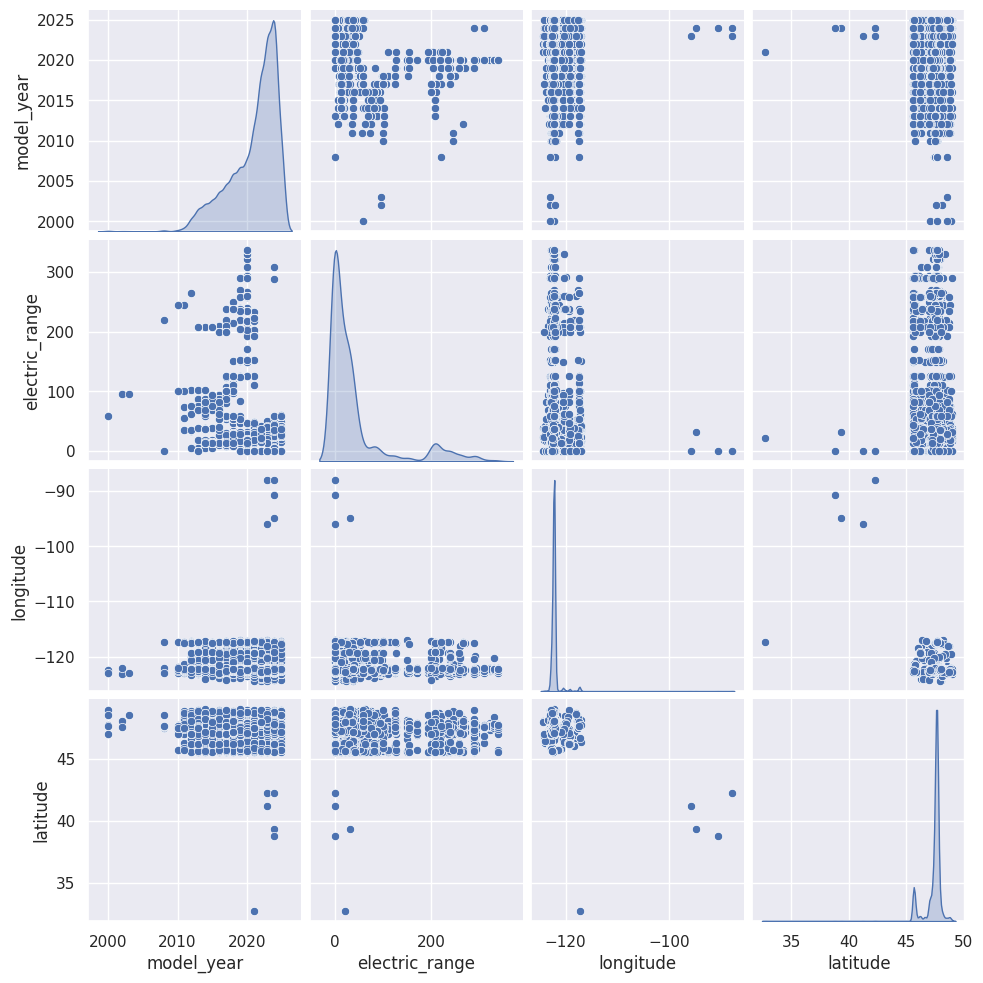

In [56]:
# Scatter plots for numerical pairs
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()

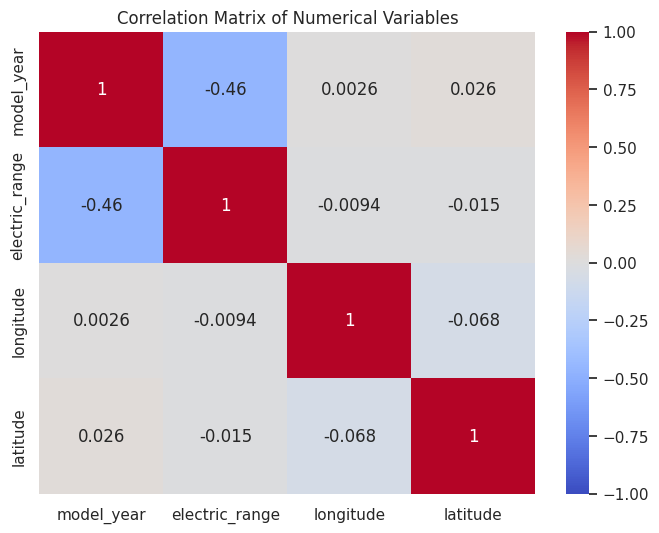

In [57]:
# Correlation matrix
corr = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

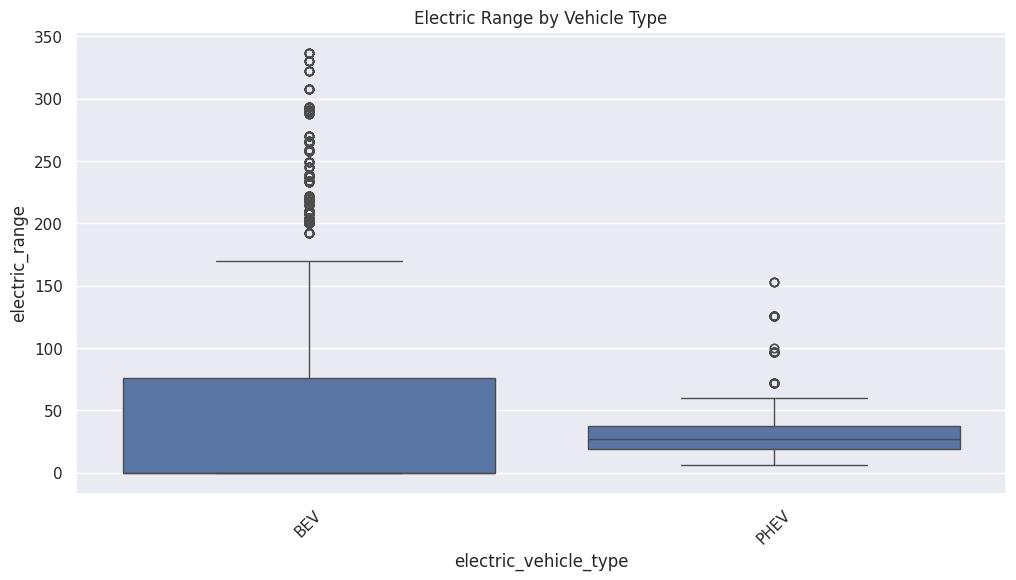

In [55]:
# Boxplot: Electric Range by Electric Vehicle Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='electric_vehicle_type', y='electric_range', data=df)
plt.title('Electric Range by Vehicle Type')
plt.xticks(rotation=45)
plt.show()



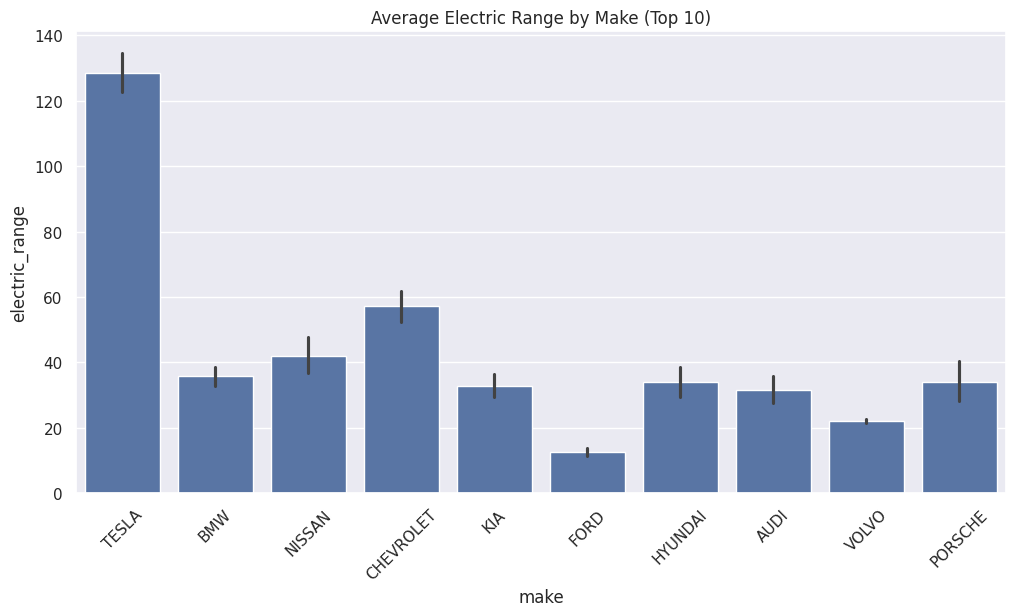

In [54]:
# Barplot: Average Electric Range by Make (Top 10)
top_makes = df['make'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='electric_range', data=df[df['make'].isin(top_makes)], estimator=np.mean)
plt.title('Average Electric Range by Make (Top 10)')
plt.xticks(rotation=45)
plt.show()

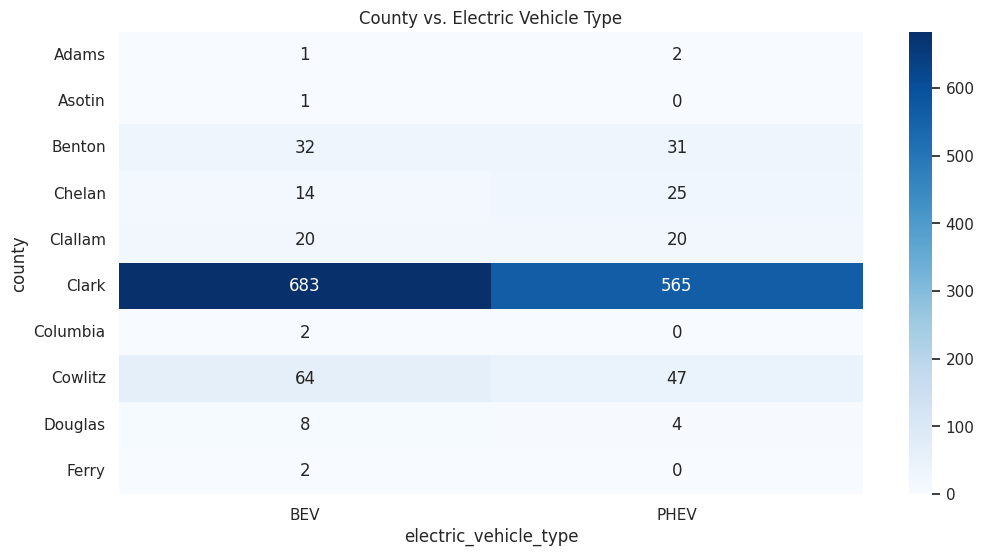

In [59]:
# Crosstab: County vs. Electric Vehicle Type
county_vehicle_type = pd.crosstab(df['county'], df['electric_vehicle_type'])
plt.figure(figsize=(12, 6))
sns.heatmap(county_vehicle_type.head(10), annot=True, cmap='Blues', fmt='d')  # Top 10 counties
plt.title('County vs. Electric Vehicle Type')
plt.show()

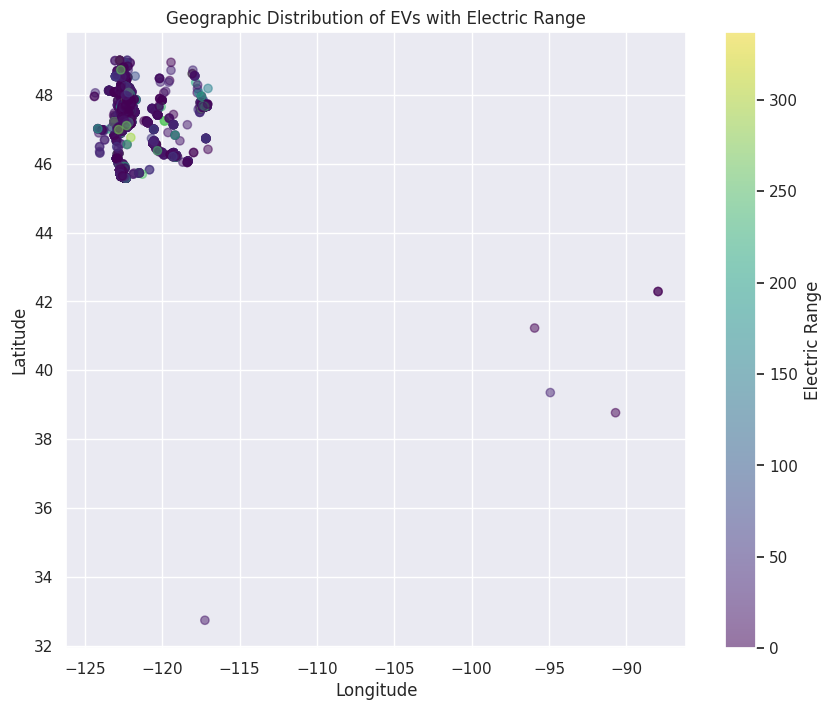

In [61]:
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['electric_range'], cmap='viridis')
plt.colorbar(label='Electric Range')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of EVs with Electric Range')
plt.show()

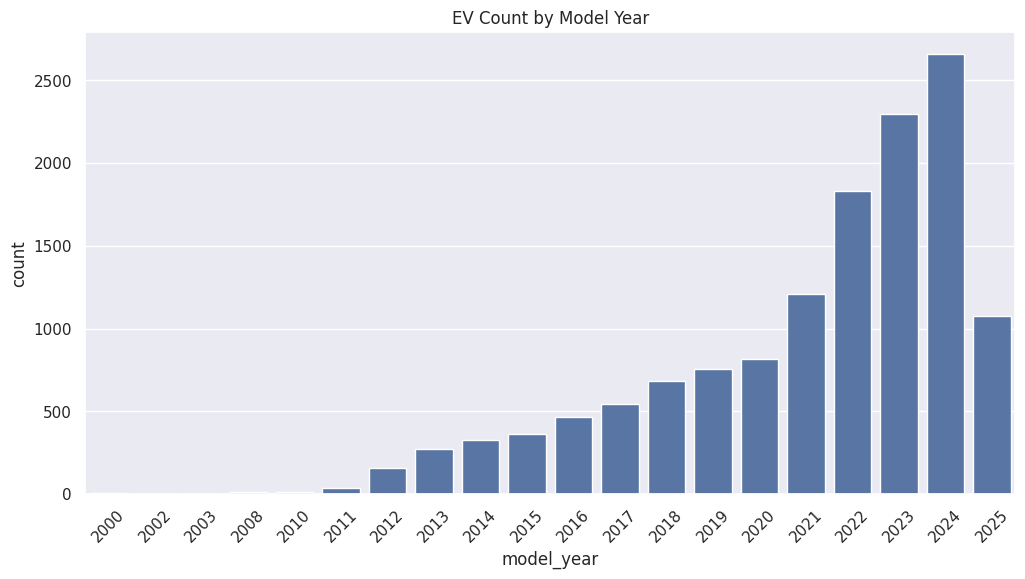

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(x='model_year', data=df)
plt.title('EV Count by Model Year')
plt.xticks(rotation=45)
plt.show()

In [65]:
import folium
m = folium.Map(location=[47.5, -120.5], zoom_start=7, tiles='OpenStreetMap')

# Add points to the map
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Size of the marker
        color='blue' if row['electric_vehicle_type'] == 'BEV' else 'red',  # Color by vehicle type
        fill=True,
        fill_opacity=0.7,
        popup=f"Make: {row['make']}<br>Model: {row['model']}<br>Range: {row['electric_range']}"  # Popup info
    ).add_to(m)

# Save the map to an HTML file
m.save('ev_locations_map.html')